In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
base = pd.read_csv('credit_card_clients.csv', header=1)

In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [8]:
x = base.iloc[:, [1,2,3,4,5,25]].values

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [10]:
wcss = list()

In [11]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[180000.0,
 143649.06809897744,
 123753.66522426665,
 108637.0884072354,
 95861.29704247152,
 86984.71793958725,
 80306.61572980105,
 76025.40307671402,
 72245.52344743308,
 68734.76471621935]

Text(0, 0.5, 'WCSS')

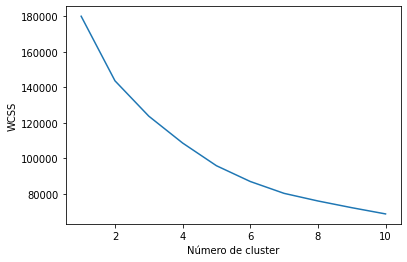

In [12]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de cluster')
plt.ylabel('WCSS')

In [14]:
kmean = KMeans(n_clusters=4, random_state=0)
previsoes = kmean.fit_predict(x)

In [15]:
lista_client = np.column_stack((base, previsoes))
lista_client = lista_client[lista_client[:,26].argsort()]

In [16]:
lista_client

array([[  27286,  280000,       1, ...,       0, 1163065,       0],
       [  26323,  360000,       2, ...,       0, 1856026,       0],
       [  14939,  310000,       2, ...,       0,  934794,       0],
       ...,
       [  14545,   80000,       1, ...,       1,  478933,       3],
       [  14559,   80000,       2, ...,       0,   91344,       3],
       [  30000,   50000,       1, ...,       1,  230874,       3]],
      dtype=int64)